In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
%reset

In [1]:
import numpy as np
import pandas as pd

In [8]:
array = pd.Series(np.random.default_rng().uniform(-10000, 10000, (500000,)))
array.to_csv("../data/uniform_distribution.csv")

In [1]:
cutoff_list = [1000, 5000, 10000, 20000, 50000, 100000]

In [11]:
df = pd.read_csv('../data/sample_dataset_big.csv')
for cutoff in cutoff_list:
    df.iloc[:cutoff].to_csv(f'../data/sample_dataset_{cutoff}.csv')

False

In [1]:



from algo.codec.kmeans_1d import KMeansLinearCompression
from algo.process.normalize import NormalizeProcessing
from scaffold import Scaffold
import numpy as np
np.seterr(all='warn')
#np.seterr(all='raise') # something breaks on the large dataset
benchmarks = []
Algos = [KMeansLinearCompression(max_rmse=0.8)]
Processes = [NormalizeProcessing()]
for algo in Algos:
    for proc in Processes:
        a = Scaffold(algo, proc, "../data/sample_dataset_1000.csv")
        a.start("test", logs=True)
        print(a.benchmark)
        benchmarks.append(a.benchmark)
        print("---------------------")

     Unnamed: 0  end_epoch  start_epoch   value_1   value_2   value_3  \
0     -1.729454        0.0          0.0 -0.153040 -0.011557  0.770365   
1     -1.725992        0.0          0.0  0.071861  0.266374  0.978824   
2     -1.722530        0.0          0.0  0.296762  0.134240  0.315383   
3     -1.719067        0.0          0.0 -0.025465  0.002118  0.553116   
4     -1.715605        0.0          0.0 -0.369816 -0.130004  0.790849   
..          ...        ...          ...       ...       ...       ...   
995    1.715605        0.0          0.0  0.085118 -0.015165 -0.769284   
996    1.719067        0.0          0.0  0.203182  0.054739 -1.037361   
997    1.722530        0.0          0.0 -0.812186 -0.343020 -1.176113   
998    1.725992        0.0          0.0 -0.993082 -0.977510 -0.024313   
999    1.729454        0.0          0.0 -0.707647 -0.748857 -0.093358   

      value_4   value_5   value_6   value_7  ...  value_17  value_18  \
0    1.932744 -0.571688 -0.526256  0.329461  ...  1

C:\Users\Admin\STIL_internship\src\algo\codec\kmeans_1d.py:24: UserWarning: source array is unsorted, consider sorting it or we will do it ourselves
  warnings.warn('source array is unsorted, consider sorting it or we will do it ourselves')


filled 1
J:  [[ 0  0  0 ...  0  0  0]
 [ 0  1  1 ... 47 47 47]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
filled 2
2 is good enough, se = 424.63074223342903
filled 1
J:  [[  0   0   0 ...   0   0   0]
 [  0   1   2 ... 305 305 305]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
filled 2
2 is good enough, se = 158.05766964365412
filled 1
J:  [[  0   0   0 ...   0   0   0]
 [  0   1   1 ... 203 203 203]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
filled 2
2 is good enough, se = 177.56187521522867
filled 1
J:  [[  0   0   0 ...   0   0   0]
 [  0   1   2 ... 944 944 944]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
filled 2
2 is good enough, se = 419.13586380096524
filled 1
J: 

IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
from scaffold.json import json_scaffold
json_scaffold("plug_config.json")

In [1]:
from algo.codec.pca_to_kmeans_1d_c import PCAToKMeansCompression
from algo.codec.kmeans_1d_c import KMeansLinearCCompression
from algo.process.normalize import NormalizeProcessing
from algo.codec.zstd import ZstdLibraryCompressionAlgorithm
from scaffold import Scaffold
import numpy as np
np.seterr(all='warn')
benchmarks = []
#np.seterr(all='raise') # something breaks on the large dataset
#datasets = [f'../data/sample_dataset_{cutoff}.csv' for cutoff in cutoff_list]
Algos = [KMeansLinearCCompression(max_rmses=[ (1 if i < 13 else 0) for i in range(27)], threads=8)]
Processes = [NormalizeProcessing()]
#files = [f'../data/sample_dataset_{times}.csv' for times in [1000, 5000, 10000, 20000, 50000, 100000, 'big']]
#for file in files:
for algo in Algos:
    for proc in Processes:
        a = Scaffold(algo, proc, '../data/sample_dataset_big.csv')
        a.start("test", logs=True)
        print(a.benchmark)
        benchmarks.append(a.benchmark)
        print("---------------------")

quantized columns:
[{'centers': array([4.08562073e-17])}, {'centers': array([0.])}, {'centers': array([0.])}, {'centers': array([-4.03588274e-15])}, {'centers': array([-1.56639146e-14])}, {'centers': array([3.58681973e-14])}, {'centers': array([8.56203997e-16])}, {'centers': array([-1.74047443e-14])}, {'centers': array([-4.04831724e-15])}, {'centers': array([-7.56195107e-15])}, {'centers': array([3.15125703e-15])}, {'centers': array([5.14432941e-15])}, {'centers': array([-1.71951342e-15])}, {'centers': array([-2.2263457 , -1.98863561, -1.98467239, -1.75134926, -1.71712392,
       -1.47567971, -1.47277036, -1.44960983, -1.3552039 , -1.32817182,
       -1.30944413, -1.30725639, -1.28385535, -1.27327156, -1.27025914,
       -1.26832332, -1.26587217, -1.25350157, -1.25251647, -1.24775154,
       -1.24425794, -1.24173803, -1.24164638, -1.23992825, -1.2398137 ,
       -1.23967625, -1.23896612, -1.23858809, -1.23812996, -1.23799251,
       -1.23779779, -1.23768324, -1.23761448, -1.23733958, -

KeyError: 'cluster'

In [16]:
benchmarks_all = benchmarks.copy()

In [24]:
file_size = [1000, 5000, 10000, 20000, 50000, 100000, 541439]

In [1]:
import pickle

In [8]:
list_clusters = [20, 50, 100, 500, 1000, 5000]

0.08477892424004665
0.0
[{'name': 'KMeansLinearCCompression', 'table_path': '../data/sample_dataset_big.csv', 'isLossLess': False, 'isLearning': False, 'compression_rate': 0.005848279984671352, 'preprocess_and_compress_time': 32.310142278671265, 'loss_rate': 0.08477892424004665, 'decompress_and_postprocess_time': 27.365088939666748, 'test_time': 59.67523121833801}, {'name': 'ZstdLibraryCompressionAlgorithm', 'table_path': '../data/sample_dataset_big.csv', 'isLossLess': True, 'isLearning': False, 'compression_rate': 0.5757005920557153, 'preprocess_and_compress_time': 61.22870111465454, 'loss_rate': 0.0, 'decompress_and_postprocess_time': 21.587544441223145, 'test_time': 82.81624555587769}]


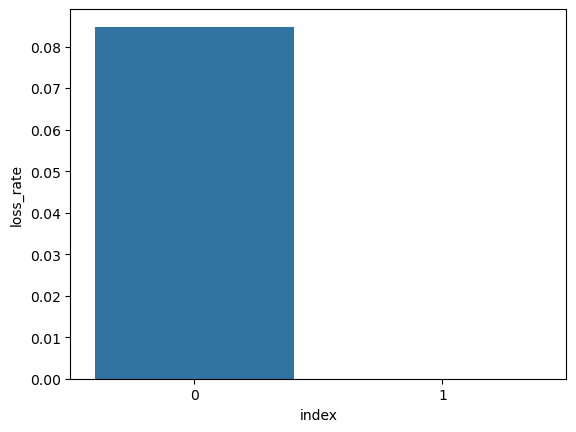

In [5]:
from plot import plot_benchmarks

plot_benchmarks(benchmarks, "loss_rate")
for i in benchmarks:
    print(i["loss_rate"])
print(benchmarks)

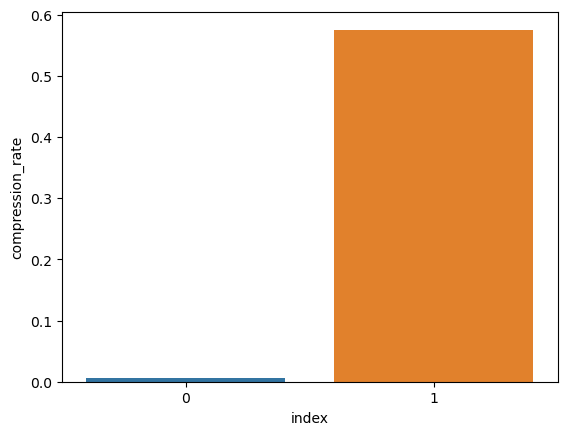

In [6]:
plot_benchmarks(benchmarks, "compression_rate")

In [2]:
import pickle
with open("../src/results_timeshifted", 'rb') as f:
    results = pickle.load(f)


In [9]:
list_rmses = [1, 0.7, 0.49, 0.34, 0.24, 0.17, 0.12, 0.08, 0.06, 0.04, 0.03, 0.02, 0.014]

In [8]:
benchmarks

[{'name': 'PCAToKMeansCompression',
  'table_path': '../data/sample_dataset_big.csv',
  'isLossLess': False,
  'isLearning': False,
  'compression_rate': 0.06797525351971463,
  'preprocess_and_compress_time': 327.07526111602783,
  'loss_rate': 0.0034163945863687497,
  'decompress_and_postprocess_time': 18.8767032623291,
  'test_time': 345.95196437835693},
 {'name': 'KMeansLinearCCompression',
  'table_path': '../data/sample_dataset_big.csv',
  'isLossLess': False,
  'isLearning': False,
  'compression_rate': 0.031056535622980424,
  'preprocess_and_compress_time': 344.5821192264557,
  'loss_rate': 0.002594490853473138,
  'decompress_and_postprocess_time': 18.87466597557068,
  'test_time': 363.45678520202637}]

In [3]:
[result['loss_rate'] for result in benchmarks]

[0.31548829956606494, 0.08477892424004665, 0.009814247966194367, 0.0]

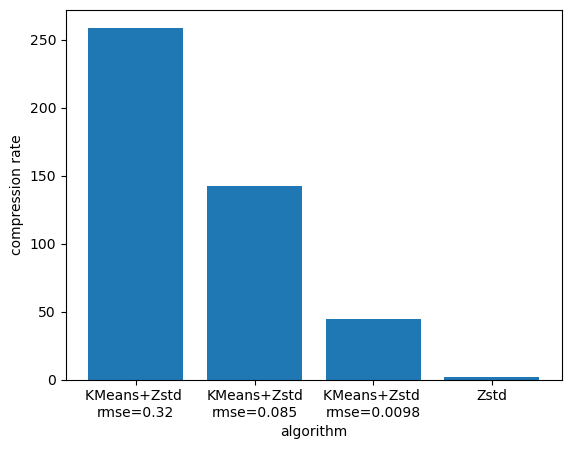

In [4]:
from matplotlib import pyplot as plt
xs = ['KMeans+Zstd \nrmse=0.32', 'KMeans+Zstd\nrmse=0.085','KMeans+Zstd \nrmse=0.0098', 'Zstd']
ys = [1/result['compression_rate'] for result in benchmarks]
plt.bar(xs, ys)
#plt.scatter(xs, ys)
plt.xlabel('algorithm')
plt.ylabel('compression rate')
plt.show()

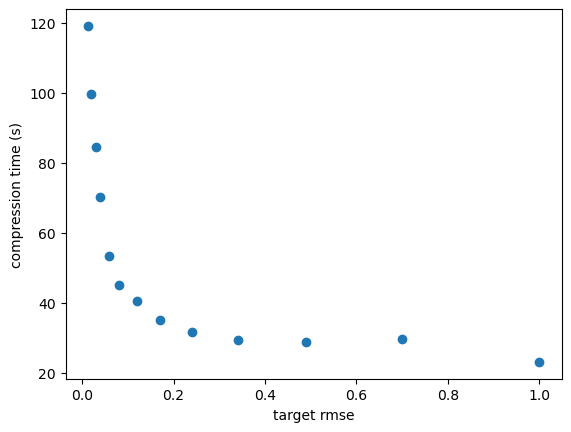

In [14]:
xs = [list_rmses]
ys = [result['preprocess_and_compress_time'] for result in benchmarks]
plt.scatter(xs, ys)
plt.xlabel('target rmse')
plt.ylabel('compression time (s)')
plt.show()

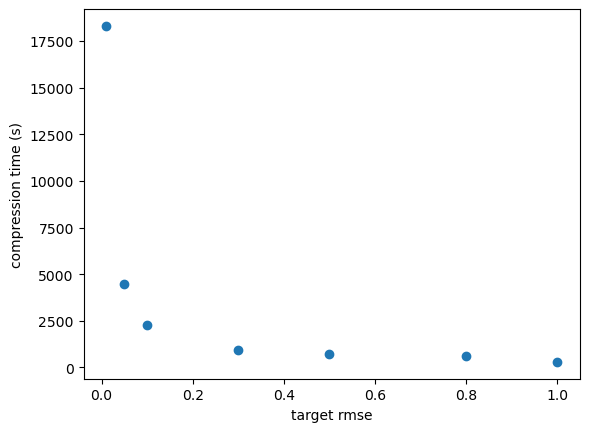

In [35]:
ys = [result['preprocess_and_compress_time'] for result in results]
plt.scatter(list_rmses, ys)
plt.xlabel('target rmse')
plt.ylabel('compression time (s)')
plt.show()

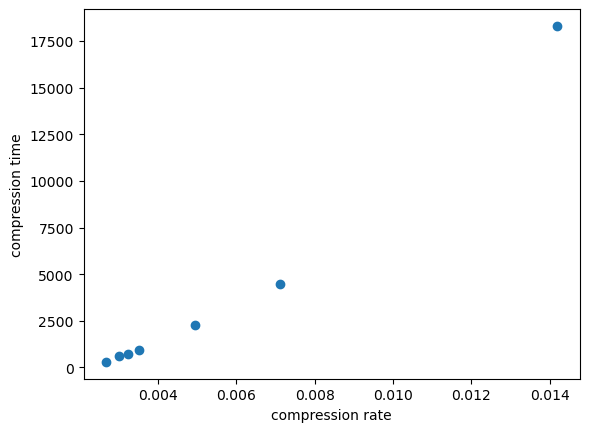

In [19]:
ys = [result['preprocess_and_compress_time'] for result in results]
xs = [result['compression_rate'] for result in results]
plt.scatter(xs, ys)
plt.xlabel('compression rate')
plt.ylabel('compression time')
plt.show()

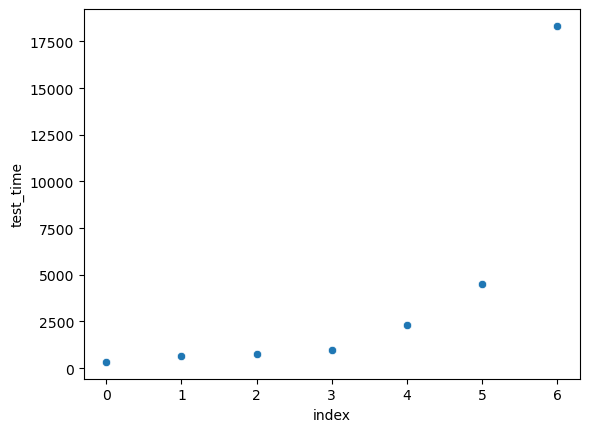

In [12]:
from plot import plot_scatter

plot_scatter(results, "test_time")

In [ ]:
from plot import plot_hist

plot_hist(benchmarks, "test_time")

In [ ]:
from generator.normal_multivariate import NormalMultivariateDistributionGenerator
gen = NormalMultivariateDistributionGenerator()
gen.gen([0,0], [[1, 0], [0, 1]], (2,))

In [123]:
import numpy as np
import pandas as pd
df = pd.read_csv("../data/smoke_detection_iot.csv").iloc[:5, [0, 2, 3, 6, 7, 8, 14]]
np_table = df.to_numpy()

In [123]:
df

In [130]:
np_table = (np_table - vecT(np.mean(np_table, axis=0)).T) / vecT(np.std(np_table, axis=0)).T

array([[-1.4, -0.5, -1. ],
       [-0.7, -1.3, -0.9],
       [ 0. , -0.6, -0.4],
       [ 0.7,  1.1,  0.9],
       [ 1.4,  1.3,  1.5]])

In [125]:
def vecT(vec):
    return np.array(vec)[np.newaxis].T

In [126]:
np_table = np_table.T

In [126]:
np_table

In [127]:
covy = np_table.T @ np_table / np_table.shape[0]

array([[-1.4, -0.7,  0. ,  0.7,  1.4],
       [-0.5, -1.3, -0.6,  1.1,  1.3],
       [-1. , -0.9, -0.4,  0.9,  1.5]])

In [202]:
covy

In [203]:
eigvals, eigvecs = np.linalg.eig(covy)

array([[1. , 0.8, 1. ],
       [0.8, 1. , 1. ],
       [1. , 1. , 1. ]])

In [201]:
eigvecs = eigvecs[:, :3]

In [191]:
eigvals = eigvals[:3]

array([[ 0.70137266, -0.56980625],
       [-0.71272483, -0.56903704],
       [ 0.00998552, -0.59288927]])

In [188]:
eigvecs

In [189]:
vecT(eigvals).T

In [190]:
np_table

array([[ 0.7, -0.6],
       [-0.7, -0.6],
       [ 0. , -0.6]])

In [192]:
compressed = np_table @ eigvecs

array([[0.2, 2.8]])

In [153]:
compressed

In [197]:
eigvecs.T

In [198]:
compressed.T @ compressed

array([[-0.6283503 ,  0.40632888,  0.38897577, -0.27750802,  0.11055367],
       [ 1.69893069,  1.67759817,  0.56927194, -1.54783845, -2.39796236]])

In [169]:
decompressed = compressed @ eigvecs.T

array([[ 3.54269976e+00, -6.17412708e-18,  2.18893506e-16],
       [-6.17412708e-18,  2.00115553e-01,  3.80474967e-17],
       [ 2.18893506e-16,  3.80474967e-17,  7.18468923e-03]])

In [155]:
eigvecs.T

In [144]:
np_table

array([[-0.56980625, -0.56903704, -0.59288927]])

In [145]:
np.linalg.pinv(eigvecs)

array([[-1.41421356, -0.52412801, -1.00331504],
       [-0.70710678, -1.27887526, -0.92252794],
       [ 0.        , -0.55179117, -0.43057336],
       [ 0.70710678,  1.09750364,  0.87774292],
       [ 1.41421356,  1.2572908 ,  1.47867342]])

In [70]:
denormalized = decompressed * vecT(np.std(np_table, axis=0)).T + vecT(np.mean(np_table, axis=0)).T

array([[-0.57451639,  0.58177401,  0.57573425]])

In [71]:
denormalized

array([[-1.4, -0.5, -1. ],
       [-0.7, -1.2, -1. ],
       [-0.1, -0.6, -0.3],
       [ 0.7,  1.1,  0.9],
       [ 1.4,  1.3,  1.4]])